In [7]:
#read the dataframe
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(r"C:\Users\rohan\Downloads\Climate_Ready_Boston_Social_Vulnerability.csv")
df

,FID,GEOID10,AREA_SQFT,AREA_ACRES,POP100_RE,HU100_RE,TotDis,TotChild,OlderAdult,Low_to_No,LEP,POC2,MedIllnes,Name,Shape__Area,Shape__Length
0,1,25025010405,3914567.54,89.8661,5522,994,470,60,331,1191,1522,1755,2131.22,Mission Hill,6.661000e+05,6036.192907
1,2,25025010404,1472713.92,33.8089,5817,1862,299,77,56,2387,2443,1749,2201.14,Fenway,2.506124e+05,2176.592171
2,3,25025010801,1376667.12,31.6039,2783,1899,84,281,390,72,462,447,1214.76,Back Bay,2.343579e+05,2542.043078
3,4,25025010702,3228780.12,74.1226,2400,1643,45,86,285,187,472,320,1014.20,Back Bay,5.496140e+05,3224.573044
4,5,25025010204,2741497.18,62.9361,3173,1283,131,13,36,895,931,1039,1181.78,Fenway,4.665852e+05,3143.610637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,176,25025081800,4024571.84,92.3915,2898,1388,329,891,286,1263,1549,2820,1054.40,Roxbury,6.843967e+05,4191.466959
176,177,25025081700,6819156.25,156.5463,3820,1599,715,1250,420,1552,1972,3746,1404.47,Roxbury,1.159715e+06,4789.149284
177,178,25025081500,3619583.13,83.0942,2134,905,340,430,197,809,1006,1957,804.02,Roxbury,6.155343e+05,4824.790469
178,179,25025081400,6678367.07,153.3142,3003,1462,268,314,283,791,1074,2318,1185.22,Jamaica Plain,1.135953e+06,6170.176383


In [3]:
# Basic statistics
print("Basic statistics:")
print(df.describe())

Basic statistics:
              FID       GEOID10     AREA_SQFT   AREA_ACRES    POP100_RE  \
count  180.000000  1.800000e+02  1.800000e+02   180.000000   180.000000   
mean    90.500000  2.502513e+10  7.675449e+06   176.204074  3431.127778   
std     52.105662  2.401763e+05  8.584628e+06   197.075935  1583.700172   
min      1.000000  2.502500e+10  4.669151e+05    10.718900     0.000000   
25%     45.750000  2.502504e+10  2.943861e+06    67.581725  2377.250000   
50%     90.500000  2.502508e+10  4.651214e+06   106.777200  3316.000000   
75%    135.250000  2.502510e+10  1.057847e+07   242.848400  4521.750000   
max    180.000000  2.502598e+10  7.730325e+07  1774.638500  8136.000000   

          HU100_RE       TotDis     TotChild   OlderAdult    Low_to_No  \
count   180.000000   180.000000   180.000000   180.000000   180.000000   
mean   1513.800000   392.783333   581.438889   351.038889   978.105556   
std     730.807844   269.137029   456.201944   242.307238   703.007963   
min       

In [22]:
# Group by neighborhood and sum the values for each column
grouped_df = df.groupby('Name').sum().reset_index()

In [24]:
# Top 5 neighborhoods with the highest population
print("\nTop 5 neighborhoods with the highest population:")
print(grouped_df.nlargest(5, 'POP100_RE')[['Name', 'POP100_RE']])


Top 5 neighborhoods with the highest population:
             Name  POP100_RE
17        Roxbury      77812
5      Dorchester      69695
16     Roslindale      60973
3        Brighton      60821
10  Jamaica Plain      42251


In [25]:
# Top 5 neighborhoods with the highest number of housing units
print("\nTop 5 neighborhoods with the highest number of housing units:")
print(grouped_df.nlargest(5, 'HU100_RE')[['Name', 'HU100_RE']])


Top 5 neighborhoods with the highest number of housing units:
             Name  HU100_RE
17        Roxbury     32887
5      Dorchester     27507
3        Brighton     27143
16     Roslindale     25153
10  Jamaica Plain     18844


In [26]:
# Calculate the normalized rates for the new dataframe
grouped_df['Disability_Rate'] = grouped_df['TotDis'] / grouped_df['POP100_RE']
grouped_df['OlderAdult_Rate'] = grouped_df['OlderAdult'] / grouped_df['POP100_RE']
grouped_df['LEP_Rate'] = grouped_df['LEP'] / grouped_df['POP100_RE']
grouped_df['Low_to_No_Rate'] = grouped_df['Low_to_No'] / grouped_df['POP100_RE']
grouped_df['POC2_Rate'] = grouped_df['POC2'] / grouped_df['POP100_RE']

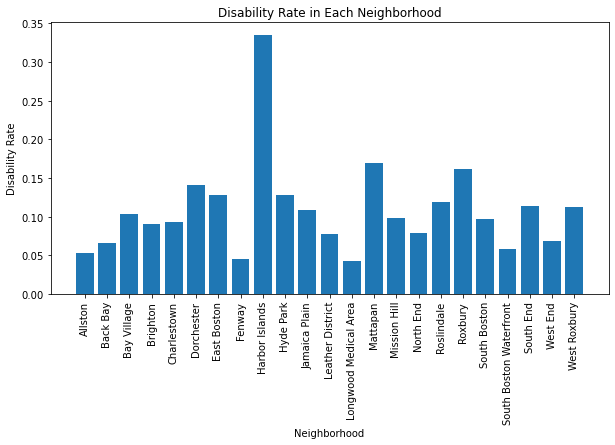

In [27]:
# Plot the Disability Rate in each neighborhood
plt.figure(figsize=(10, 5))
plt.bar(grouped_df['Name'], grouped_df['Disability_Rate'])
plt.xticks(rotation=90)
plt.xlabel('Neighborhood')
plt.ylabel('Disability Rate')
plt.title('Disability Rate in Each Neighborhood')
plt.show()

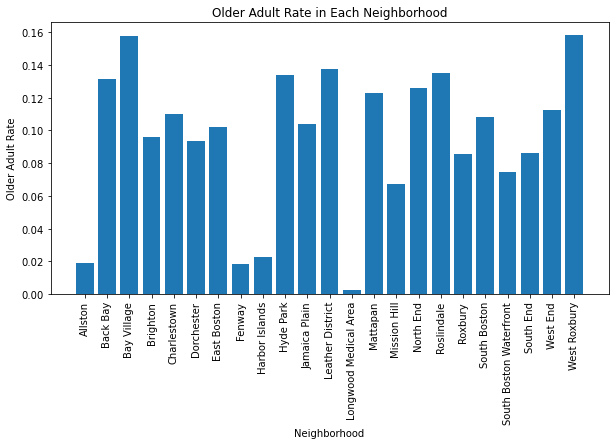

In [28]:
# Plot the Older Adult Rate in each neighborhood
plt.figure(figsize=(10, 5))
plt.bar(grouped_df['Name'], grouped_df['OlderAdult_Rate'])
plt.xticks(rotation=90)
plt.xlabel('Neighborhood')
plt.ylabel('Older Adult Rate')
plt.title('Older Adult Rate in Each Neighborhood')
plt.show()

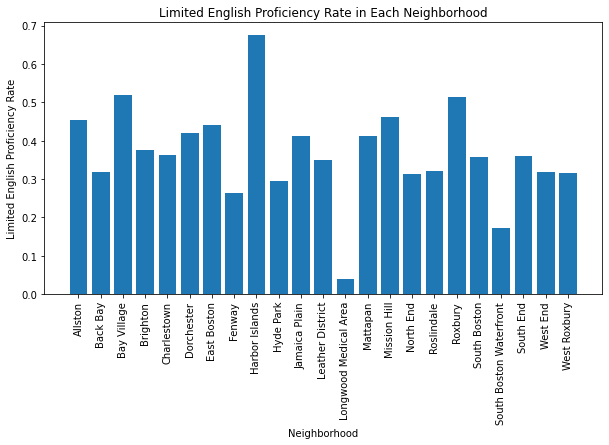

In [29]:
# Plot the Limited English Proficiency Rate in each neighborhood
plt.figure(figsize=(10, 5))
plt.bar(grouped_df['Name'], grouped_df['LEP_Rate'])
plt.xticks(rotation=90)
plt.xlabel('Neighborhood')
plt.ylabel('Limited English Proficiency Rate')
plt.title('Limited English Proficiency Rate in Each Neighborhood')
plt.show()




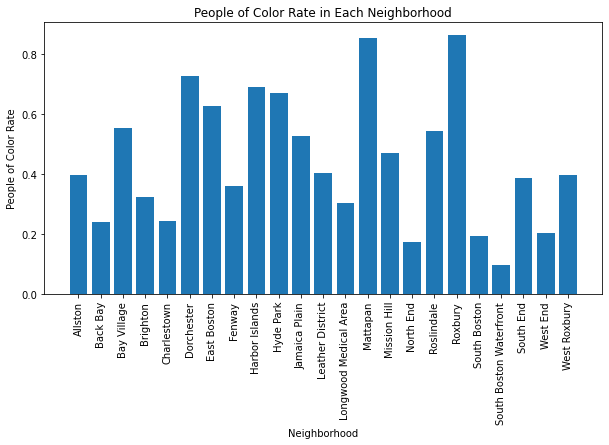

In [30]:

# Plot the People of Color Rate in each neighborhood
plt.figure(figsize=(10, 5))
plt.bar(grouped_df['Name'], grouped_df['POC2_Rate'])
plt.xticks(rotation=90)
plt.xlabel('Neighborhood')
plt.ylabel('People of Color Rate')
plt.title('People of Color Rate in Each Neighborhood')
plt.show()

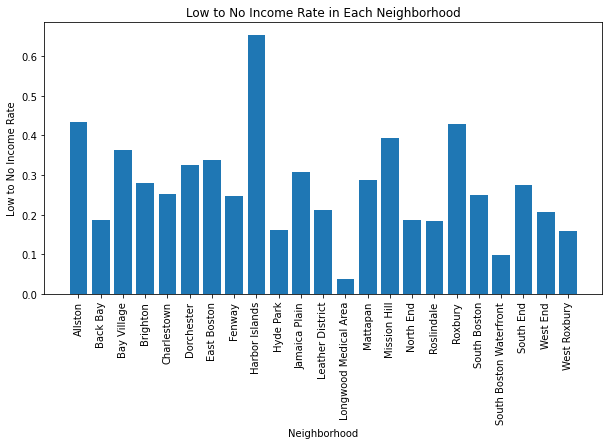

In [31]:
#plot the low to no income rate in each neighborhood
plt.figure(figsize=(10, 5))
plt.bar(grouped_df['Name'], grouped_df['Low_to_No_Rate'])
plt.xticks(rotation=90)
plt.xlabel('Neighborhood')
plt.ylabel('Low to No Income Rate')
plt.title('Low to No Income Rate in Each Neighborhood')
plt.show()
